In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import *

import warnings
warnings.simplefilter('ignore')

In [3]:
train = pd.read_csv("./datasets/전처리완료/코스닥_train원본.csv",index_col=0)
test =  pd.read_csv('./datasets/전처리완료/코스닥_test원본.csv',index_col=0)
# 산업군 = pd.read_csv('./datasets/ww만들기.csv',index_col=0,encoding='cp949')
# 산업군 = 산업군[['상장협 산업분류(대분류)', '상장협 산업분류 코드(대분류)']]

In [4]:
df = pd.concat([train,test],axis=0)

In [5]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '차입금의존도', '부채비율', '순운전자본비율', '산업군',
       '총자본정상영업이익률', '자기자본순이익률', '총자본순이익률', '매출액총이익률', '금융비용부담률', '자본금회전률',
       '유형자산회전율', '자기자본회전률', '타인자본회전률', '총자본회전률', '합계_기말인원(명)', '대주주지분율',
       '유형자산증가율', '매출액증가율', '자기자본증가율', '총자본증가율', '정상영업이익증가율', '누적수익성비율',
       '현금흐름 대 자산', '현금흐름 대 매출액', 'TMD', '시총/총자산', 'EBIT/총자산', '당기전기영업손익',
       'FINDEP', 'WW지수', 'EBITDA마진율', 'target_1', 'target_2', 'target_3',
       'abs(영업현금흐름-당기순이익)/매출액'],
      dtype='object')

## 순운전자본비율

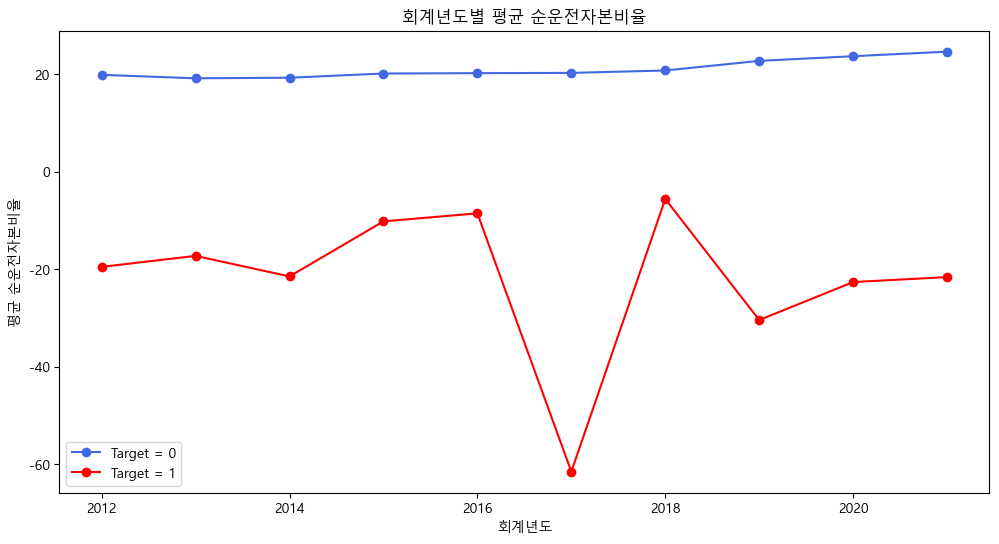

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

# target이 0인 데이터와 1인 데이터 추출
target_0 = df[df['target_3'] == 0]
target_1 = df[df['target_3'] == 1]

# 회계년도별 순운전자본비율 계산
grouped_0 = target_0.groupby('회계년도')['순운전자본비율'].mean()
year_0 = grouped_0.index
x_0 = grouped_0.values

grouped_1 = target_1.groupby('회계년도')['순운전자본비율'].mean()
year_1 = grouped_1.index
x_1 = grouped_1.values

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 두 개의 데이터를 하나의 ax에 그리기
ax.plot(year_0, x_0, color='royalblue', label='Target = 0',marker='o')
ax.plot(year_1, x_1, color='red', label='Target = 1',marker='o')

ax.set_title('회계년도별 평균 순운전자본비율')
ax.set_xlabel('회계년도')
ax.set_ylabel('평균 순운전자본비율')

# 범례 추가
ax.legend()

plt.show()

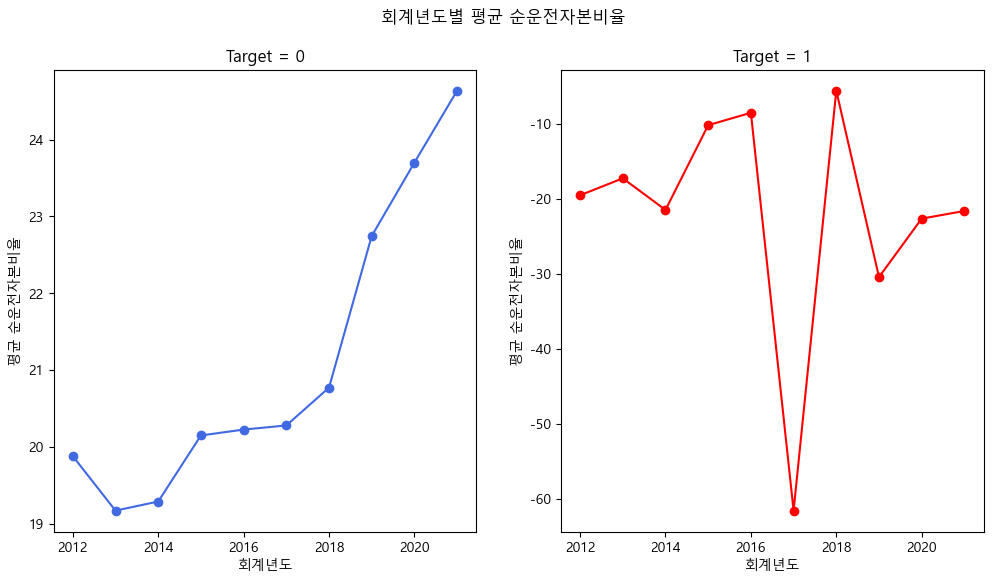

In [7]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue',marker='o')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('평균 순운전자본비율')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red',marker='o')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 순운전자본비율')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 순운전자본비율')

plt.show()

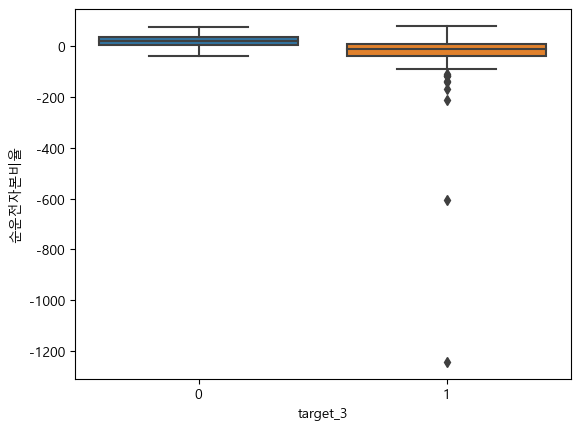

In [8]:
# target_3 값 분리
정상 = df[df['target_3'] == 0]['순운전자본비율']
부실 = df[df['target_3'] == 1]['순운전자본비율']

# 박스플롯 그리기
fig, ax = plt.subplots()
sns.boxplot(data=[정상, 부실], ax=ax)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('target_3')
ax.set_ylabel('순운전자본비율')
plt.show()

## 'abs(영업현금흐름-당기순이익)/매출액'

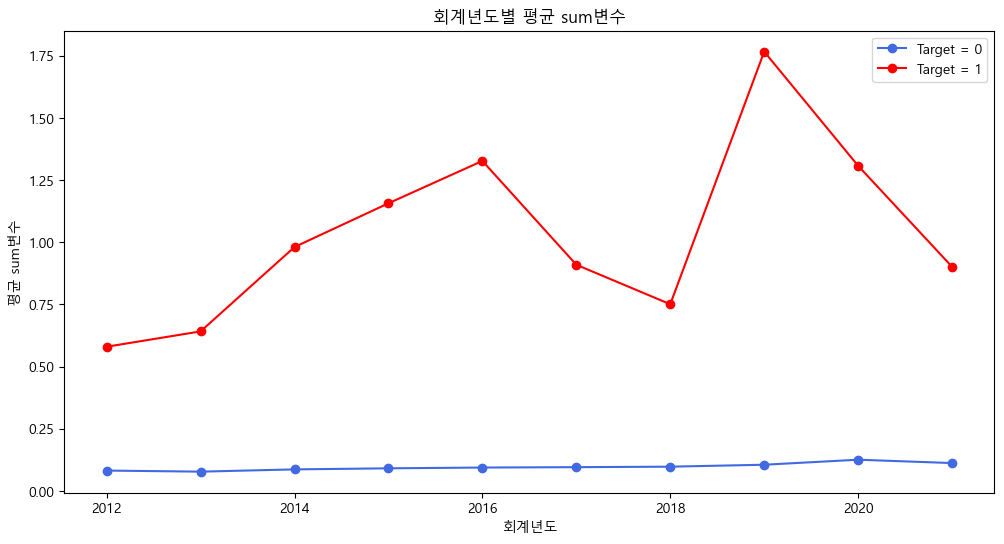

In [9]:
# 회계년도별  계산
grouped_0 = target_0.groupby('회계년도')['abs(영업현금흐름-당기순이익)/매출액'].mean()
year_0 = grouped_0.index
x_0 = grouped_0.values

grouped_1 = target_1.groupby('회계년도')['abs(영업현금흐름-당기순이익)/매출액'].mean()
year_1 = grouped_1.index
x_1 = grouped_1.values

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 두 개의 데이터를 하나의 ax에 그리기
ax.plot(year_0, x_0, color='royalblue', label='Target = 0',marker='o')
ax.plot(year_1, x_1, color='red', label='Target = 1',marker='o')

ax.set_title('회계년도별 평균 sum변수')
ax.set_xlabel('회계년도')
ax.set_ylabel('평균 sum변수')

# 범례 추가
ax.legend()

plt.show()

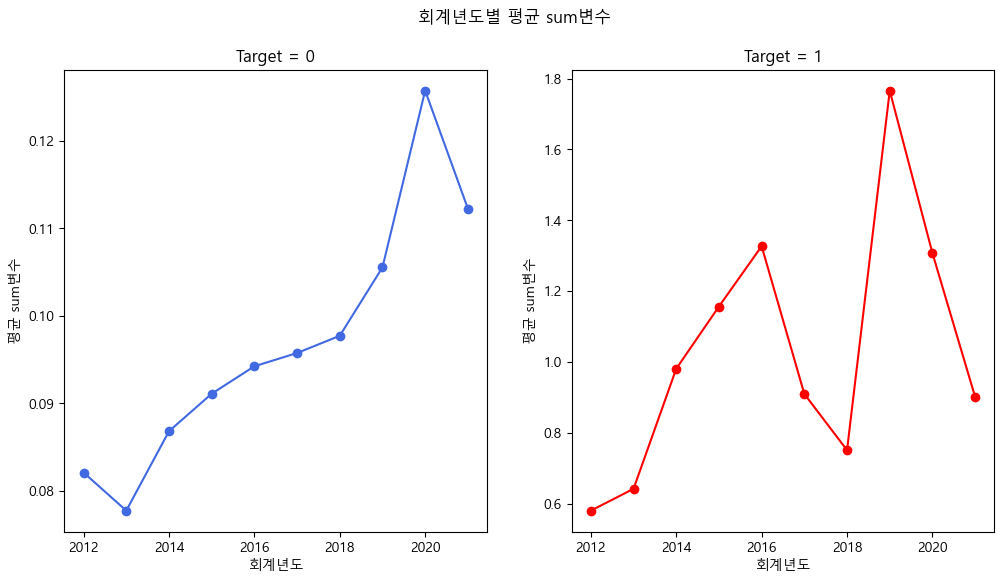

In [10]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue',marker='o')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('평균 sum변수')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red',marker='o')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 sum변수')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 sum변수')

plt.show()

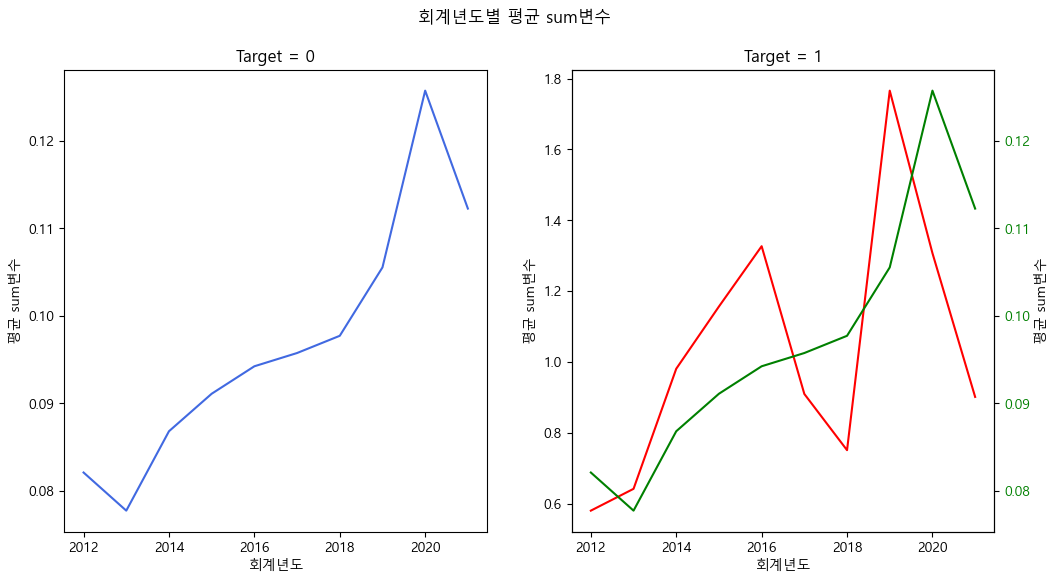

In [11]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('평균 sum변수')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 sum변수')

# twin y-axis를 생성하여 오른쪽에 위치시킴
ax2 = ax1.twinx()
ax2.plot(year_1, x_0, color='green')
ax2.set_ylabel('평균 sum변수')
ax2.tick_params(axis='y', labelcolor='green')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 sum변수')

plt.show()

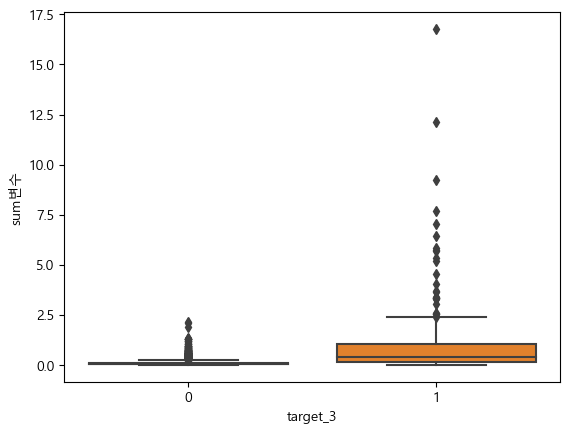

In [12]:
# target_3 값 분리
정상 = df[df['target_3'] == 0]['abs(영업현금흐름-당기순이익)/매출액']
부실 = df[df['target_3'] == 1]['abs(영업현금흐름-당기순이익)/매출액']

# 박스플롯 그리기
fig, ax = plt.subplots()
sns.boxplot(data=[정상, 부실], ax=ax)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('target_3')
ax.set_ylabel('sum변수')
plt.show()

## 금융비용부담율

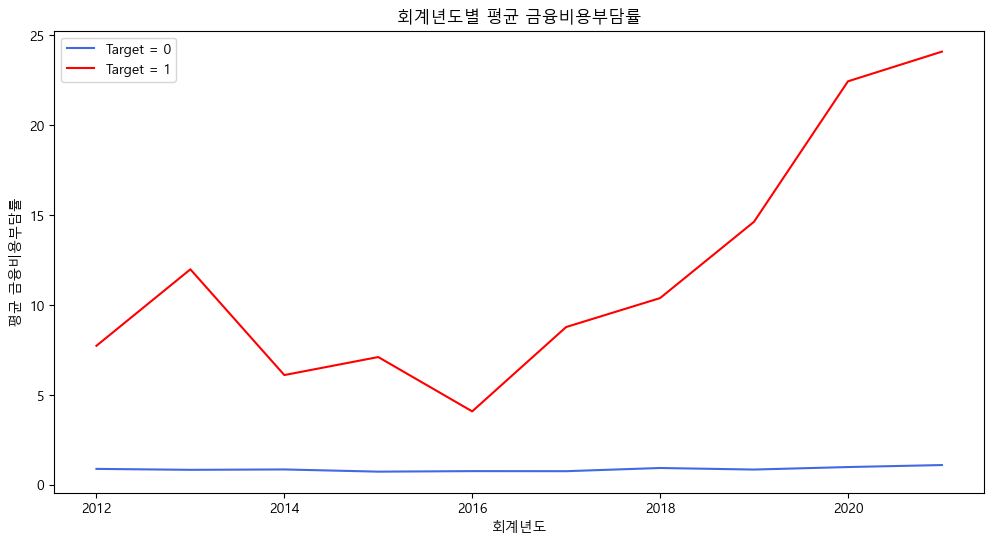

In [13]:
# 회계년도별  계산
grouped_0 = target_0.groupby('회계년도')['금융비용부담률'].mean()
year_0 = grouped_0.index
x_0 = grouped_0.values

grouped_1 = target_1.groupby('회계년도')['금융비용부담률'].mean()
year_1 = grouped_1.index
x_1 = grouped_1.values

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 두 개의 데이터를 하나의 ax에 그리기
ax.plot(year_0, x_0, color='royalblue', label='Target = 0')
ax.plot(year_1, x_1, color='red', label='Target = 1')

ax.set_title('회계년도별 평균 금융비용부담률')
ax.set_xlabel('회계년도')
ax.set_ylabel('평균 금융비용부담률')

# 범례 추가
ax.legend()

plt.show()

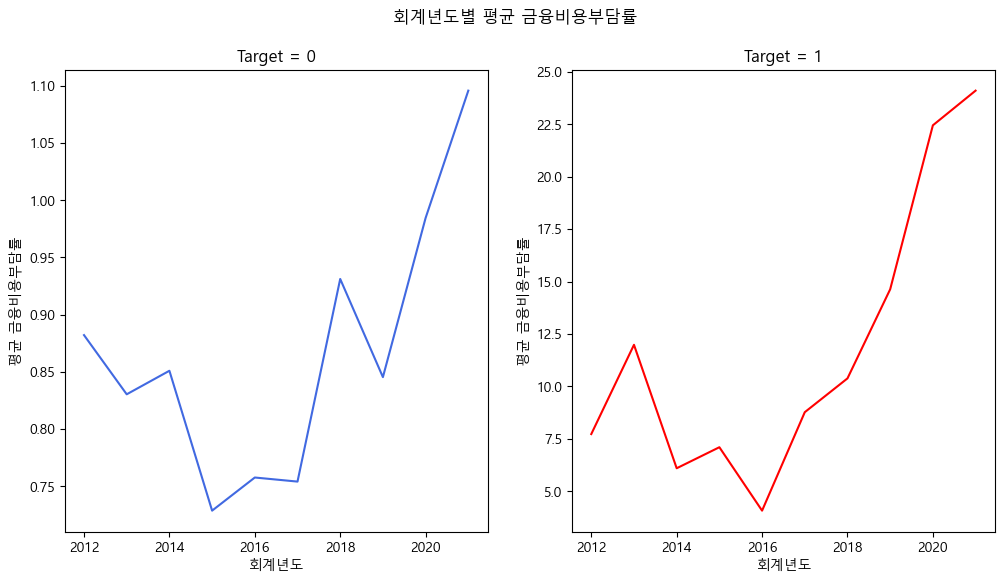

In [14]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('평균 금융비용부담률')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 금융비용부담률')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 금융비용부담률')

plt.show()

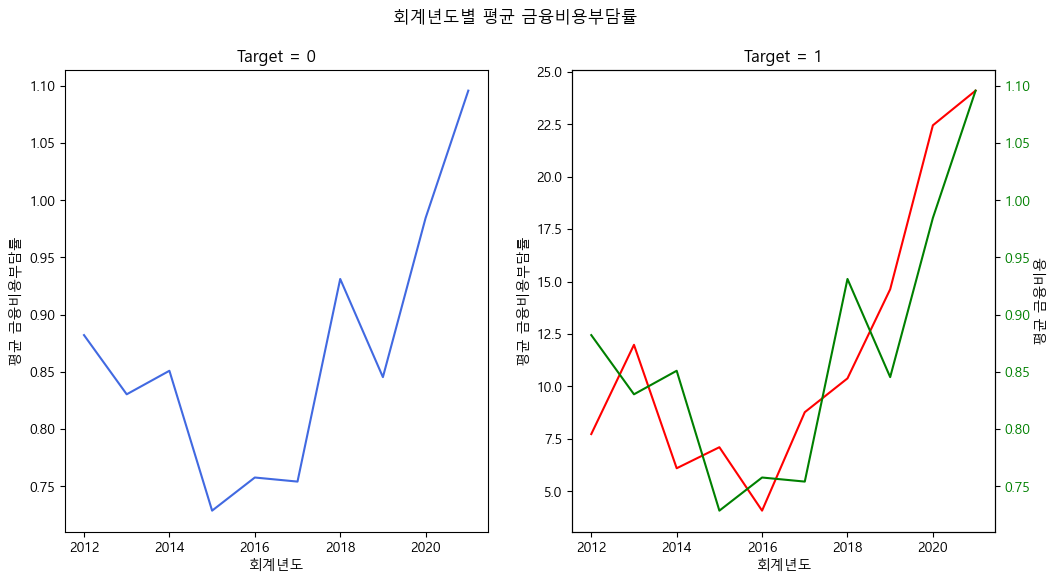

In [15]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('평균 금융비용부담률')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 금융비용부담률')

# twin y-axis를 생성하여 오른쪽에 위치시킴
ax2 = ax1.twinx()
ax2.plot(year_1, x_0, color='green')
ax2.set_ylabel('평균 금융비용')
ax2.tick_params(axis='y', labelcolor='green')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 금융비용부담률')

plt.show()

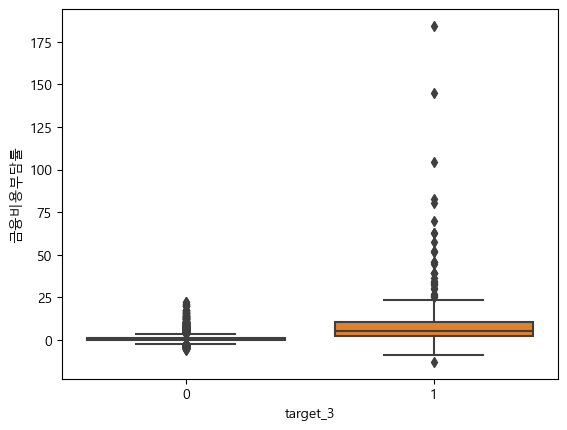

In [16]:
# target_3 값 분리
정상 = df[df['target_3'] == 0]['금융비용부담률']
부실 = df[df['target_3'] == 1]['금융비용부담률']

# 박스플롯 그리기
fig, ax = plt.subplots()
sns.boxplot(data=[정상, 부실], ax=ax)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('target_3')
ax.set_ylabel('금융비용부담률')
plt.show()

## 누적수익성비율

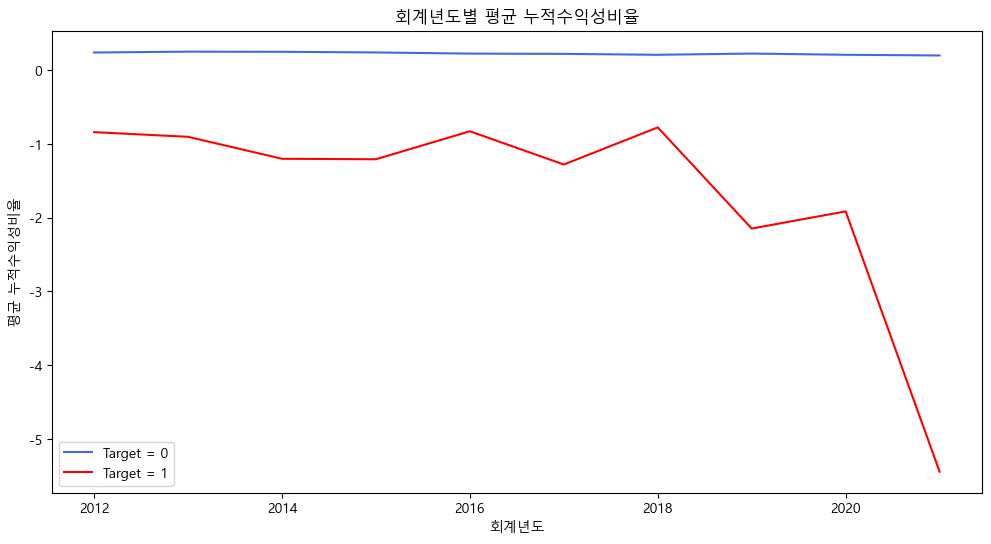

In [17]:
# 회계년도별  계산
grouped_0 = target_0.groupby('회계년도')['누적수익성비율'].mean()
year_0 = grouped_0.index
x_0 = grouped_0.values

grouped_1 = target_1.groupby('회계년도')['누적수익성비율'].mean()
year_1 = grouped_1.index
x_1 = grouped_1.values

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 두 개의 데이터를 하나의 ax에 그리기
ax.plot(year_0, x_0, color='royalblue', label='Target = 0')
ax.plot(year_1, x_1, color='red', label='Target = 1')

ax.set_title('회계년도별 평균 누적수익성비율')
ax.set_xlabel('회계년도')
ax.set_ylabel('평균 누적수익성비율')

# 범례 추가
ax.legend()

plt.show()

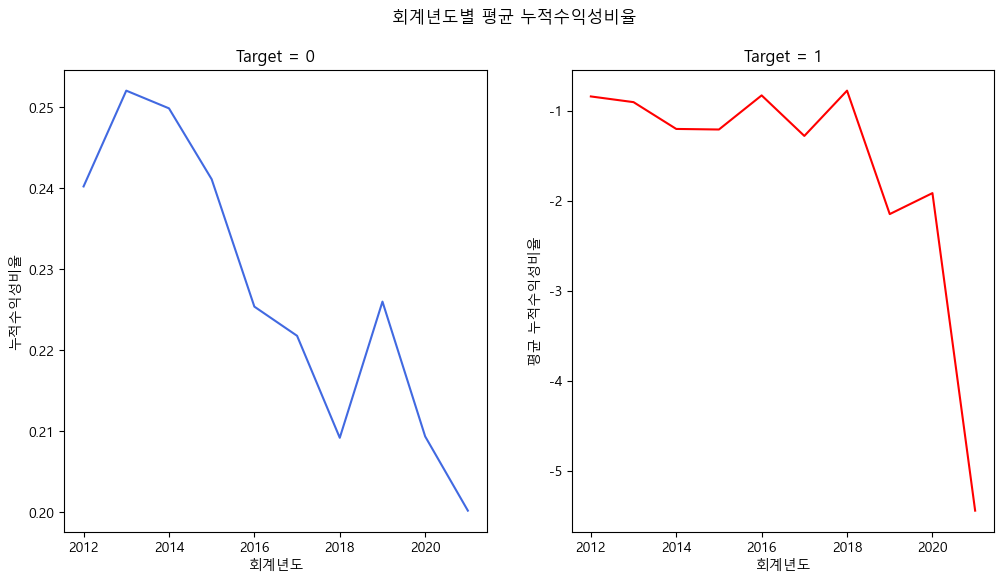

In [18]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('누적수익성비율')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 누적수익성비율')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 누적수익성비율')

plt.show()

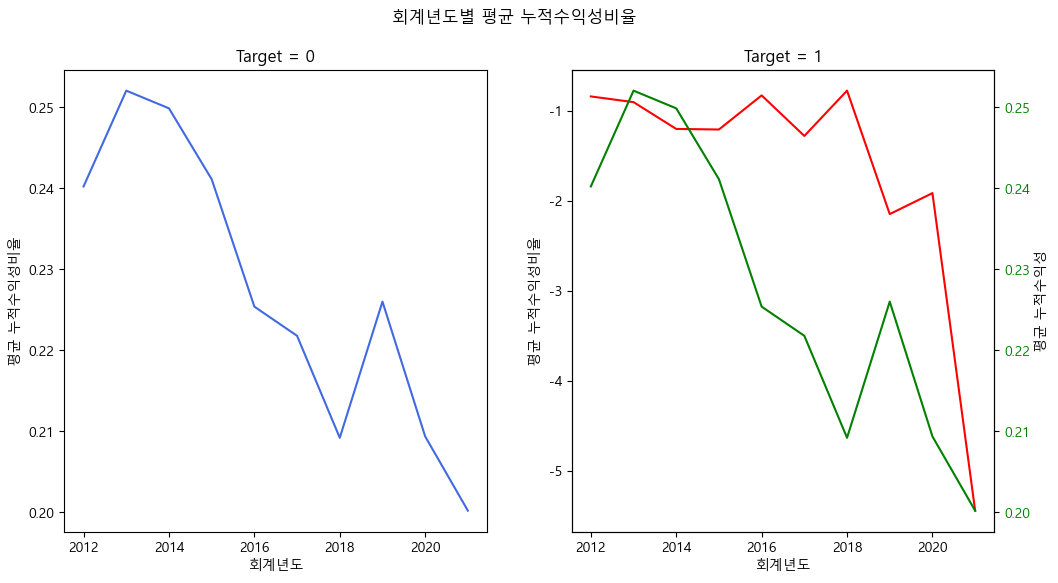

In [19]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('평균 누적수익성비율')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 누적수익성비율')

# twin y-axis를 생성하여 오른쪽에 위치시킴
ax2 = ax1.twinx()
ax2.plot(year_1, x_0, color='green')
ax2.set_ylabel('평균 누적수익성')
ax2.tick_params(axis='y', labelcolor='green')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 누적수익성비율')

plt.show()

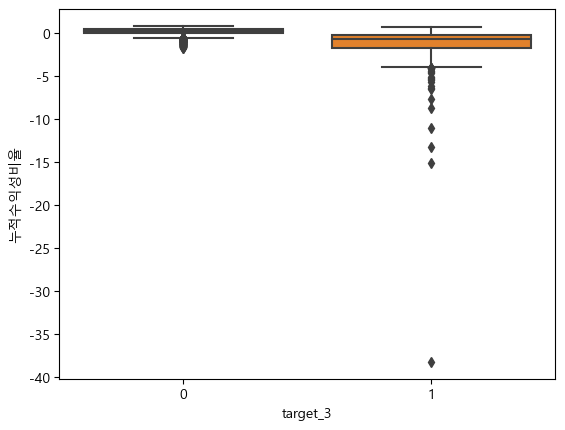

In [20]:
# target_3 값 분리
정상 = df[df['target_3'] == 0]['누적수익성비율']
부실 = df[df['target_3'] == 1]['누적수익성비율']

# 박스플롯 그리기
fig, ax = plt.subplots()
sns.boxplot(data=[정상, 부실], ax=ax)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('target_3')
ax.set_ylabel('누적수익성비율')
plt.show()

## TMD

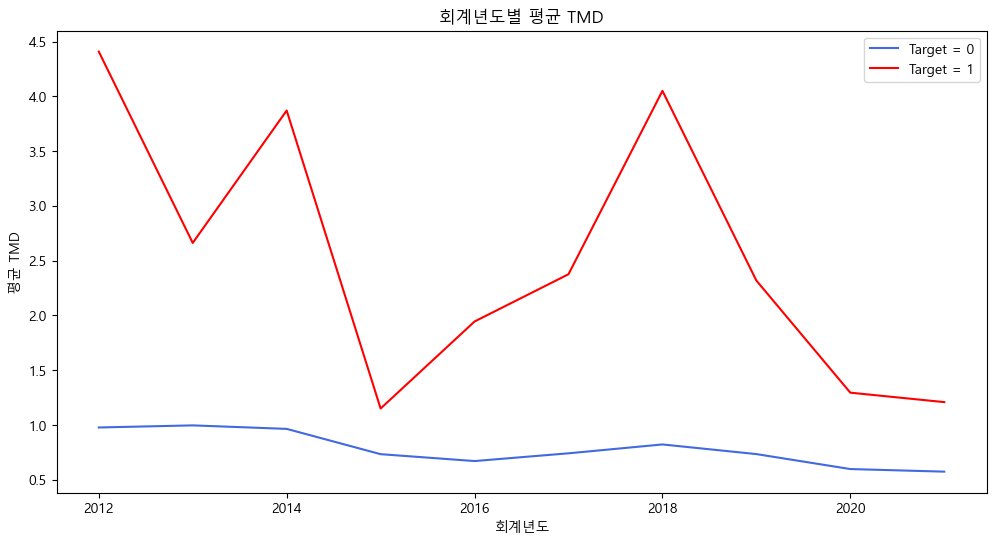

In [21]:
# 회계년도별  계산
grouped_0 = target_0.groupby('회계년도')['TMD'].mean()
year_0 = grouped_0.index
x_0 = grouped_0.values

grouped_1 = target_1.groupby('회계년도')['TMD'].mean()
year_1 = grouped_1.index
x_1 = grouped_1.values

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 두 개의 데이터를 하나의 ax에 그리기
ax.plot(year_0, x_0, color='royalblue', label='Target = 0')
ax.plot(year_1, x_1, color='red', label='Target = 1')

ax.set_title('회계년도별 평균 TMD')
ax.set_xlabel('회계년도')
ax.set_ylabel('평균 TMD')

# 범례 추가
ax.legend()

plt.show()

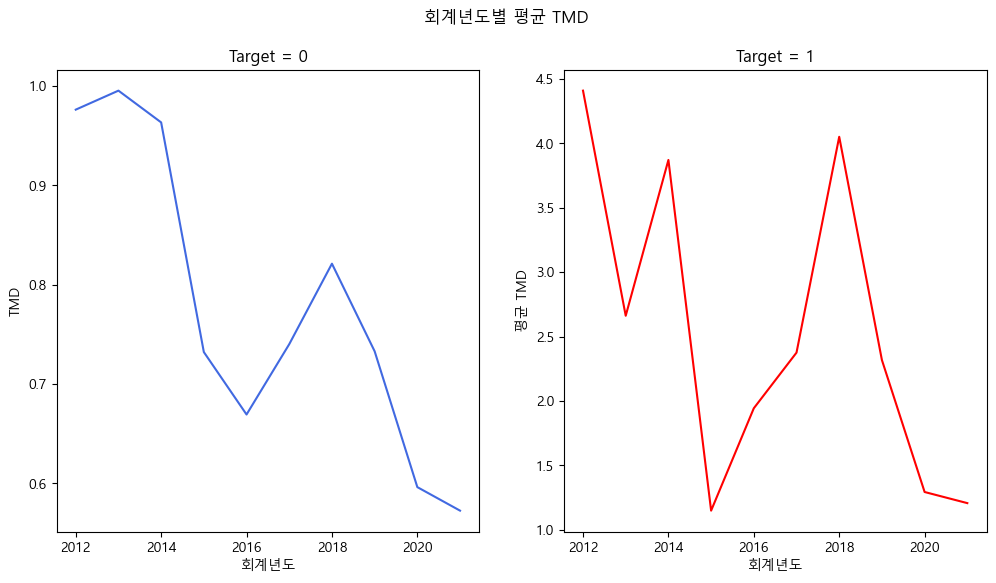

In [22]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('TMD')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 TMD')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 TMD')

plt.show()

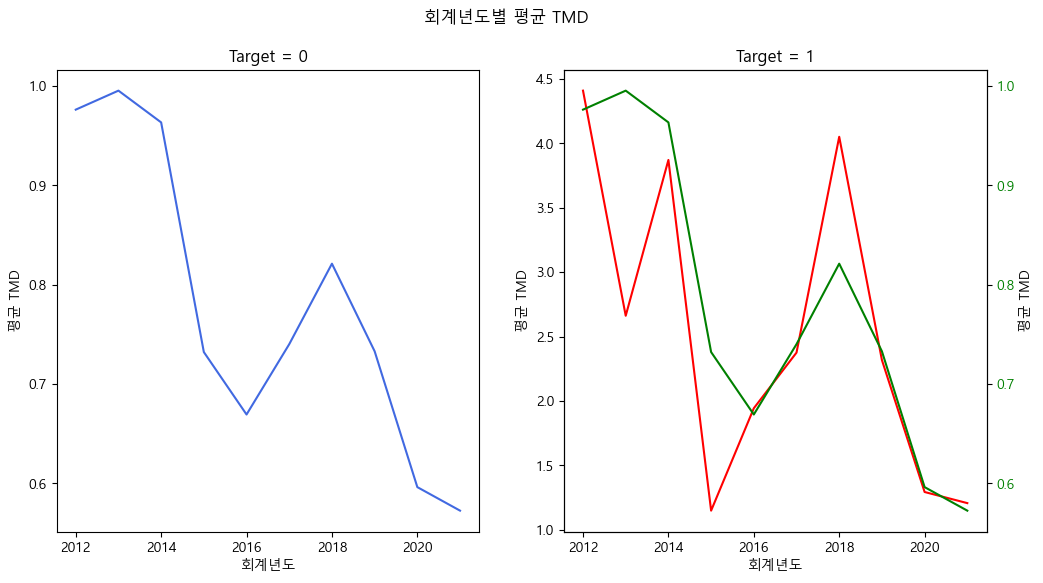

In [23]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('평균 TMD')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 TMD')

# twin y-axis를 생성하여 오른쪽에 위치시킴
ax2 = ax1.twinx()
ax2.plot(year_1, x_0, color='green')
ax2.set_ylabel('평균 TMD')
ax2.tick_params(axis='y', labelcolor='green')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 TMD')

plt.show()

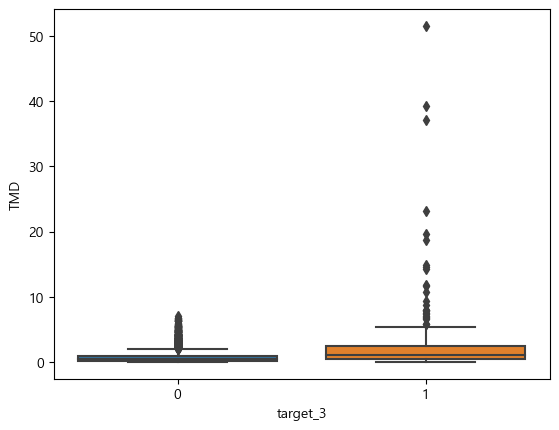

In [24]:
# target_3 값 분리
정상 = df[df['target_3'] == 0]['TMD']
부실 = df[df['target_3'] == 1]['TMD']

# 박스플롯 그리기
fig, ax = plt.subplots()
sns.boxplot(data=[정상, 부실], ax=ax)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('target_3')
ax.set_ylabel('TMD')
plt.show()

## WW지수

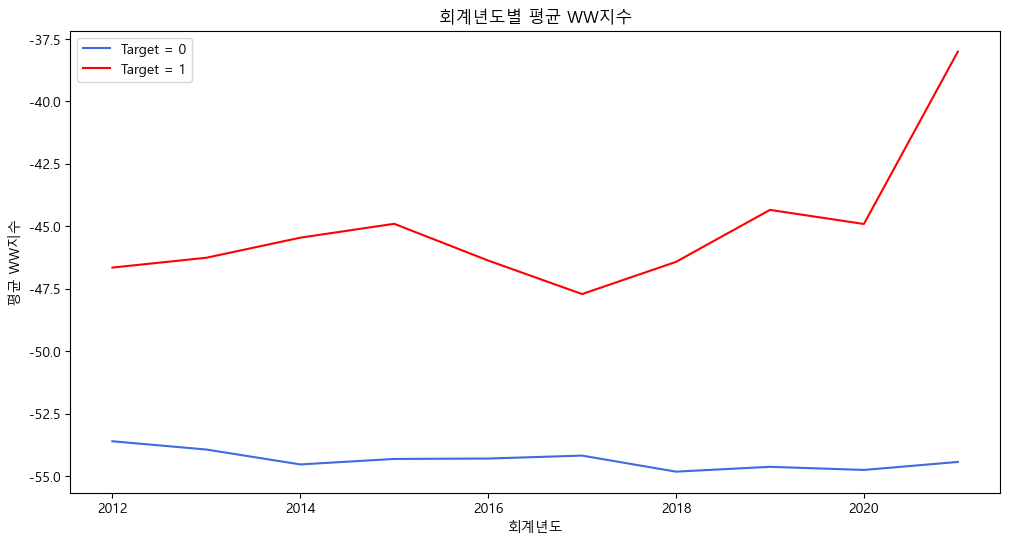

In [25]:
# 회계년도별  계산
grouped_0 = target_0.groupby('회계년도')['WW지수'].mean()
year_0 = grouped_0.index
x_0 = grouped_0.values

grouped_1 = target_1.groupby('회계년도')['WW지수'].mean()
year_1 = grouped_1.index
x_1 = grouped_1.values

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 두 개의 데이터를 하나의 ax에 그리기
ax.plot(year_0, x_0, color='royalblue', label='Target = 0')
ax.plot(year_1, x_1, color='red', label='Target = 1')

ax.set_title('회계년도별 평균 WW지수')
ax.set_xlabel('회계년도')
ax.set_ylabel('평균 WW지수')

# 범례 추가
ax.legend()

plt.show()

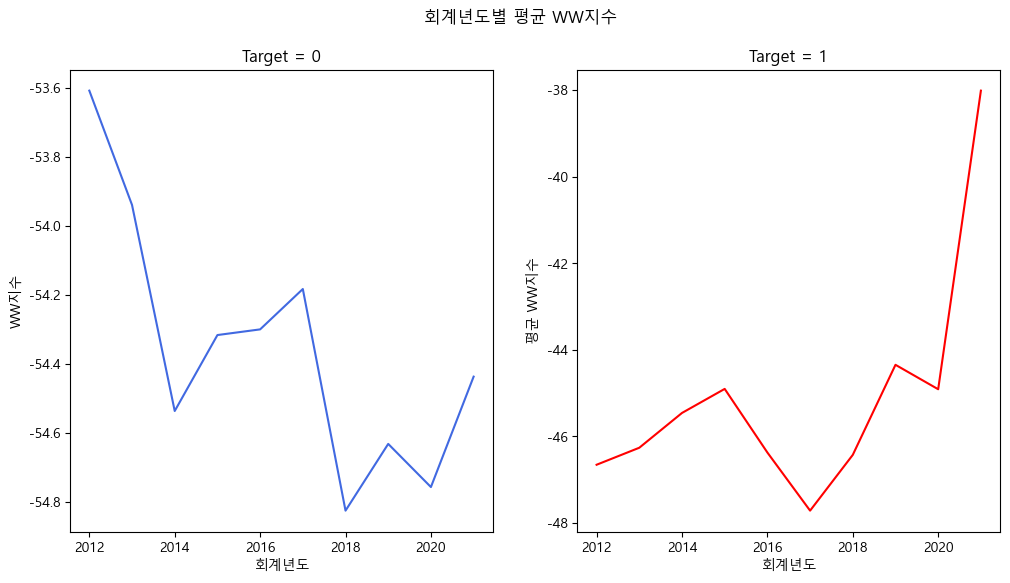

In [26]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('WW지수')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 WW지수')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 WW지수')

plt.show()

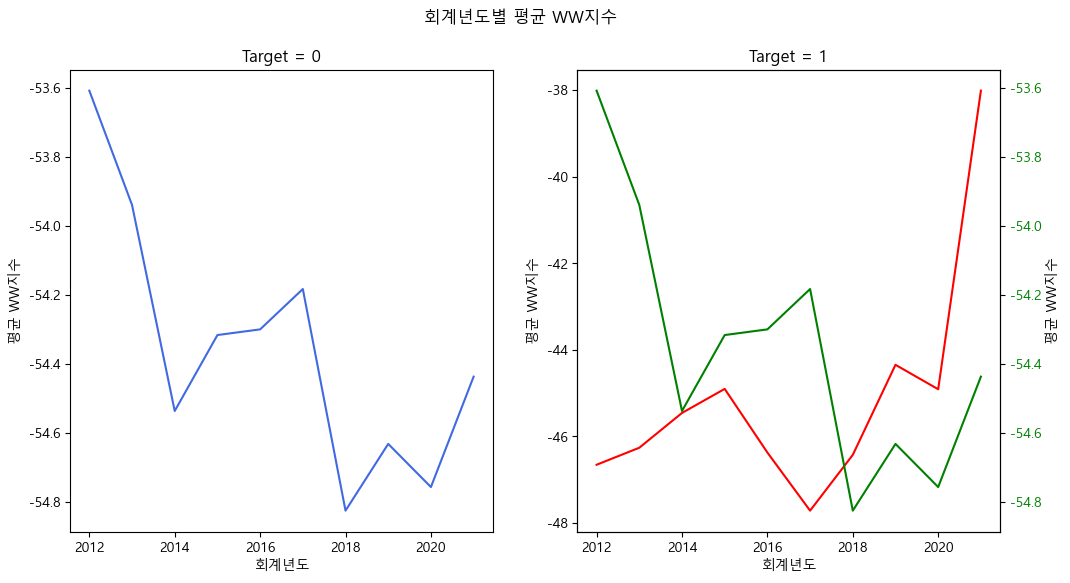

In [27]:
# 그래프 그리기
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

# 첫 번째 그래프
ax0.plot(year_0,x_0, color='royalblue')
ax0.set_title('Target = 0')
ax0.set_xlabel('회계년도')
ax0.set_ylabel('평균 WW지수')

# 두 번째 그래프
ax1.plot(year_1, x_1, color='red')
ax1.set_title('Target = 1')
ax1.set_xlabel('회계년도')
ax1.set_ylabel('평균 WW지수')

# twin y-axis를 생성하여 오른쪽에 위치시킴
ax2 = ax1.twinx()
ax2.plot(year_1, x_0, color='green')
ax2.set_ylabel('평균 WW지수')
ax2.tick_params(axis='y', labelcolor='green')

# 전체 그래프 제목
fig.suptitle('회계년도별 평균 WW지수')

plt.show()

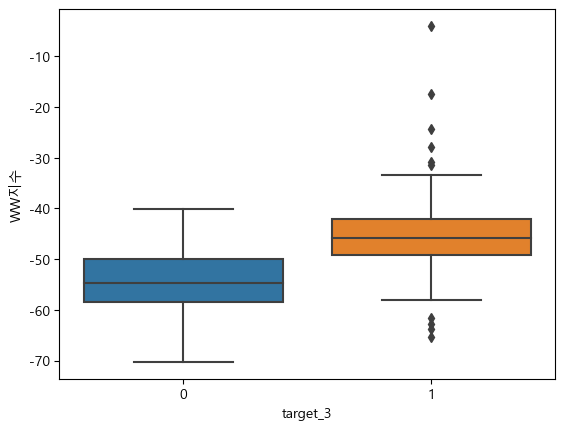

In [28]:
# target_3 값 분리
정상 = df[df['target_3'] == 0]['WW지수']
부실 = df[df['target_3'] == 1]['WW지수']

# 박스플롯 그리기
fig, ax = plt.subplots()
sns.boxplot(data=[정상, 부실], ax=ax)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('target_3')
ax.set_ylabel('WW지수')
plt.show()

In [32]:
수치형_df= df.select_dtypes(float)

In [44]:
def box_plot(feature):
    temp = df[str(feature)]
    sns.boxplot(temp.values)


interact(box_plot,feature= list(수치형_df)) 

interactive(children=(Dropdown(description='feature', options=('차입금의존도', '부채비율', '순운전자본비율', '총자본정상영업이익률', '자기자…

<function __main__.box_plot(feature)>